## Ploting Gaia using napari

In [1]:
%gui qt5
import napari
from magicgui import magicgui
from napari import types
import numpy as np
import blosc2

In [2]:
g3d = blosc2.open("/Users/faltet/blosc/Gaia/gaia-3d-balanced.b2nd")
#g3d.info

In [3]:
origin = 7000
minicube_side = 100
start = origin - minicube_side // 2
stop = origin + minicube_side // 2
maxval = 15000

In [4]:
@magicgui(
auto_call=True,
x={'widget_type': 'Slider', 'value': origin, 'min': 0, 'max': maxval},
y={'widget_type': 'Slider', 'value': origin, 'min': 0, 'max': maxval},
z={'widget_type': 'Slider', 'value': origin, 'min': 0, 'max': maxval},
)
def index_array(x=start, y=start, z=start) -> types.LayerDataTuple:
    array = g3d[x:x+minicube_side, y:y+minicube_side, z:z+minicube_side]
    coords = np.transpose(np.nonzero(array))
    return (coords, {"name": "gaia", "shading": "spherical", "size": 1.0}, "points")

viewer = napari.Viewer(ndisplay=3)
viewer.window.add_dock_widget(index_array, area='bottom')
_ = index_array()  # magic for forcing the layers to exist
layer = viewer.layers[-1]

# Attempt to remove selections; still it does not work though
def remove_selection(*args):
    layer.selected_data = []
layer.events.data.connect(remove_selection)

<function __main__.remove_selection(*args)>

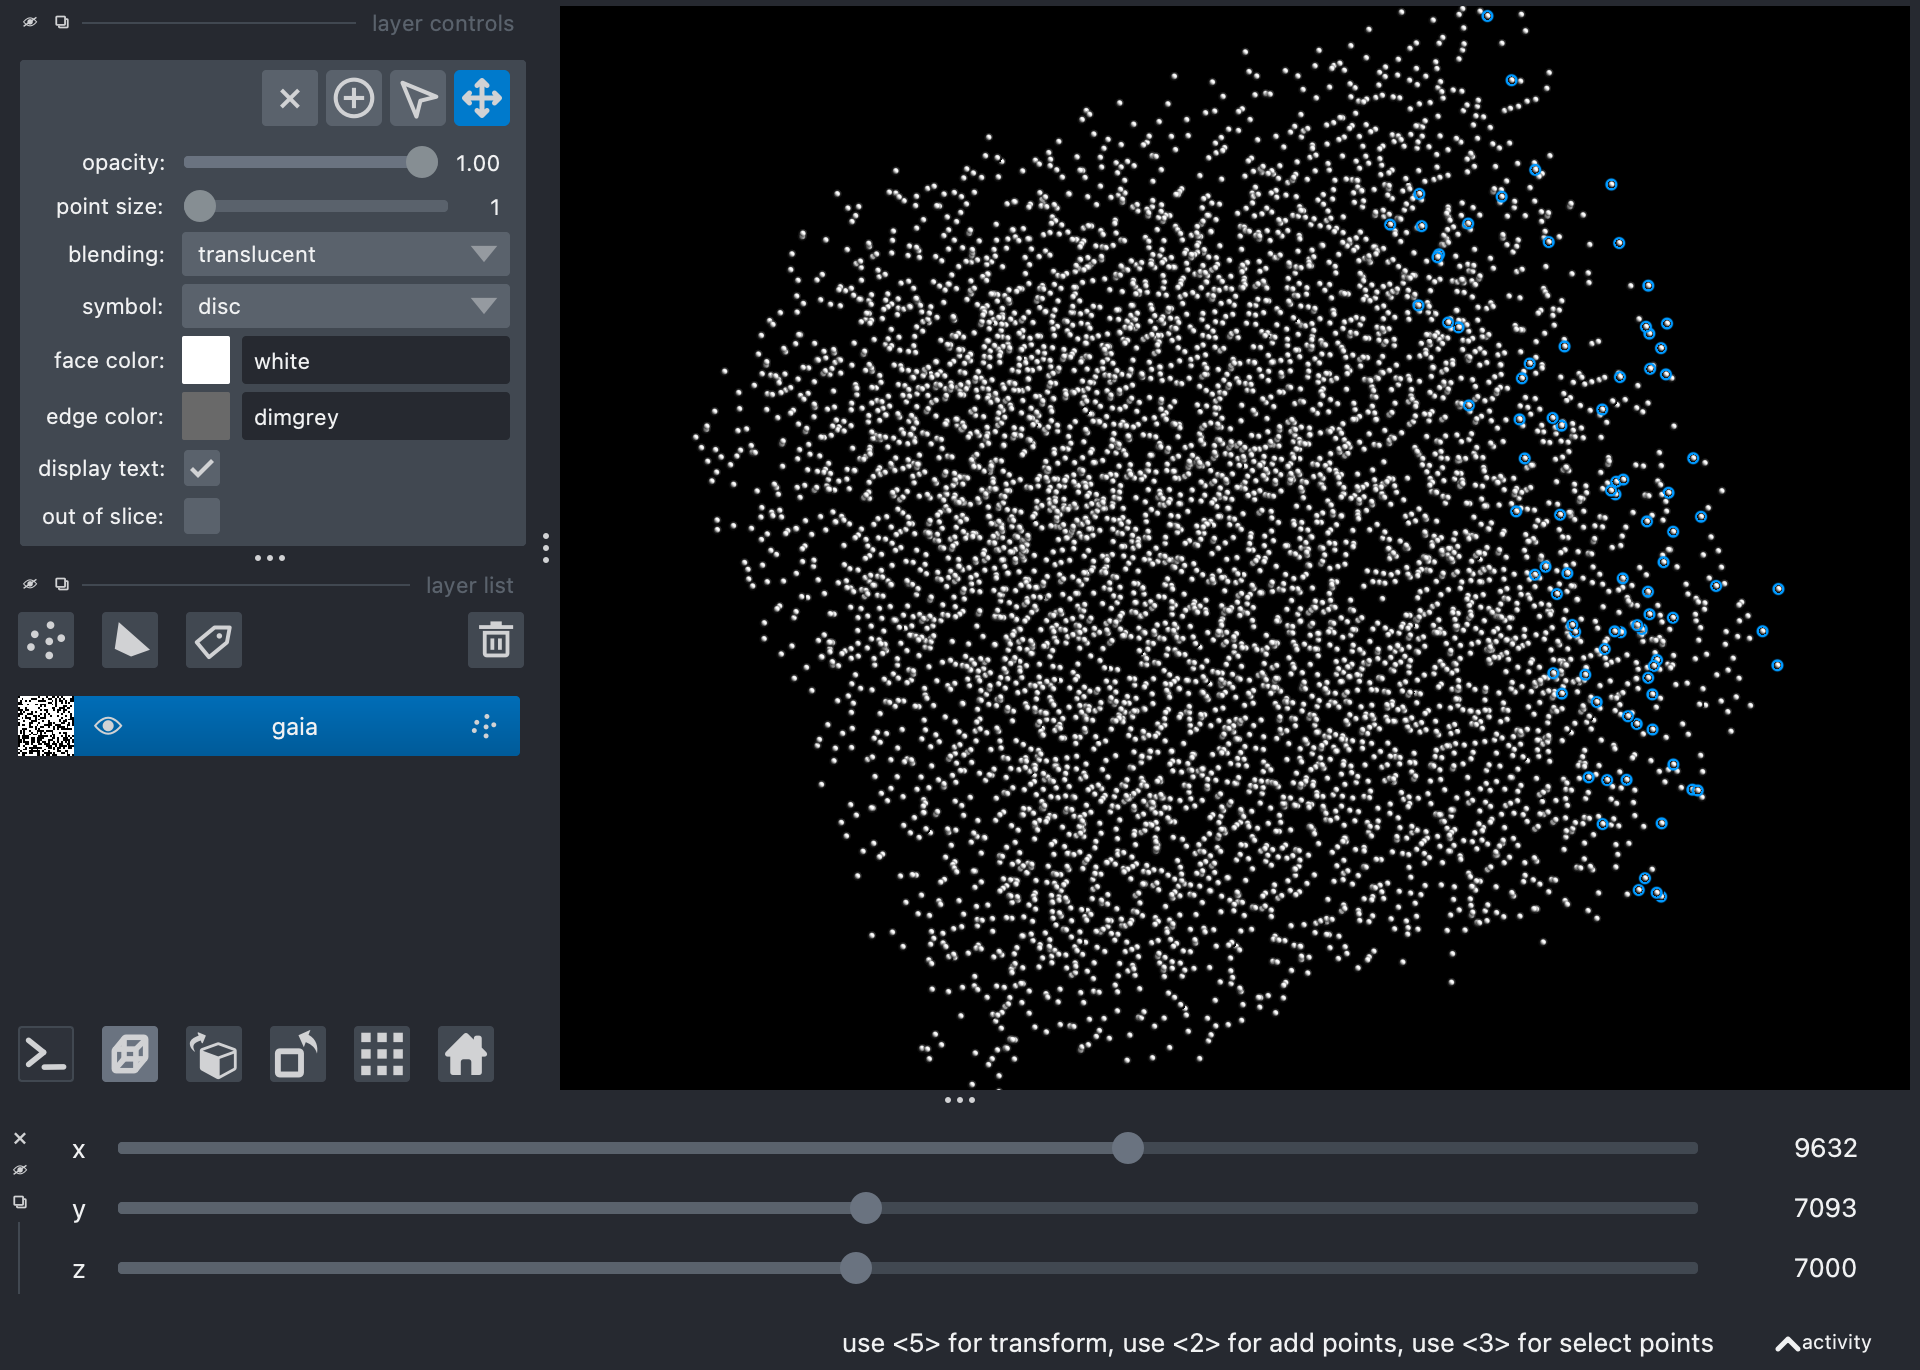

In [5]:
napari.utils.nbscreenshot(viewer, alt_text="A rotated 3D view")